<a href="https://colab.research.google.com/github/dieineb/Bracis23/blob/main/BasicModel_Sartaj_Test3_Glioma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Model - New Dataset TEST

## Dataset [Brain Tumor Classification - MRI ](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)

> No tumor

> Glioma Tumor

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize

from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras

In [ ]:
datadir = '/content/gdrive/MyDrive/Bracis23-main/Test3'
categories = ['no', 'yes']
x = []
y = []

for category in categories:
    path = os.path.join(datadir, category)
    for image in os.listdir(path):
        images = cv2.imread(os.path.join(path, image))
        color = cv2.imread(path, cv2.COLOR_BGR2RGB)
        images = resize(images, (224, 224, 3), mode = 'constant', preserve_range = True)
        x.append(images)
        y.append(categories.index(category))

In [ ]:
no = 0
yes = 0

for i in range(len(x)):
    if y[i] == 0:
        no= no + 1
    elif y[i] == 1:
        yes = yes + 1

print("Total Images: ", len(x))
print("Total Images No Tumor: ", no)
print("Total Images Tumor: ", yes)

Total Images:  205
Total Images No Tumor:  105
Total Images Tumor:  100


In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(y))}
target_val=  [target_dict[y[i]]
              for i in range(len(y))]

In [ ]:
X_test, y_test = (x,y)# Test

print('Test size:', len(X_test))

Test size: 205


In [ ]:
classes = np.unique (y_test)
classes_num = len(classes)

print ('Outputs: ', classes_num)
print ('Classes: ', classes)

Outputs:  2
Classes:  [0 1]


In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Bracis/bracisNB/modelBr35HDataAug2.h5')

print("TensorFlow version:", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")
model.summary()

TensorFlow version: 2.13.0
Eager mode:  True
GPU is available
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                          

In [ ]:
x_test = np.array(X_test)
y_test = np.array(y_test)
print('-----------------------')

print (x_test.shape, y_test.shape)


-----------------------
(205, 224, 224, 3) (205,)


In [ ]:
print ('Loss and Accuracy:')
model.evaluate(x_test, y_test)

Loss and Accuracy:
7/7 [==============================] - 7s 34ms/step - loss: 1.4748 - accuracy: 0.7268


[1.4747862815856934, 0.7268292903900146]

7/7 [==============================] - 0s 16ms/step


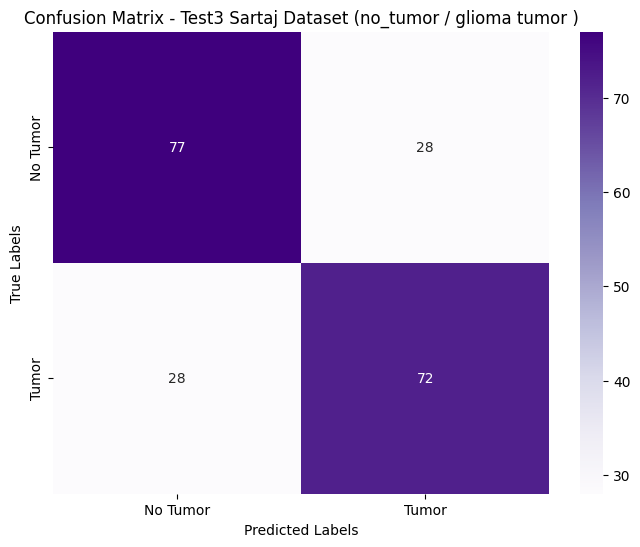

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

cmat=confusion_matrix(y_test,y_pred,labels=[0,1])
cm_df = pd.DataFrame(cmat)

cmat_df = pd.DataFrame(cmat,
                     index = ['No Tumor','Tumor' ],
                     columns = ['No Tumor','Tumor' ])

plt.figure(figsize=(8,6))
sns.heatmap(cmat_df, annot=True,fmt="d",cmap=plt.cm.Purples )
plt.title('Confusion Matrix - Test3 Sartaj Dataset (no_tumor / glioma tumor )')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
tp = cmat[1][1] # True positive
fp = cmat[0][1] # False positive
tn = cmat[0][0] # True negative
fn = cmat[1][0] # False negative

accuracy = ((tp+tn)*100)/np.sum(cmat)
precision = (tp*100)/(tp+fp)
sensibility = (tp*100/(tp+fn))
specificity = (tn*100)/(fp+tn)

print('Metrics Test3 Sartaj Dataset (no tumor - glioma tumor)')
print('Accuracy:..........>',accuracy,"%")
print('Precision:..........>',precision,"%")
print('Recall:.....>',sensibility,"%")
print('Specificity:....>',specificity,"%")

plt.show()

Metrics Test3 Sartaj Dataset (no tumor - glioma tumor)
Accuracy:..........> 72.6829268292683 %
Precision:..........> 72.0 %
Recall:.....> 72.0 %
Specificity:....> 73.33333333333333 %


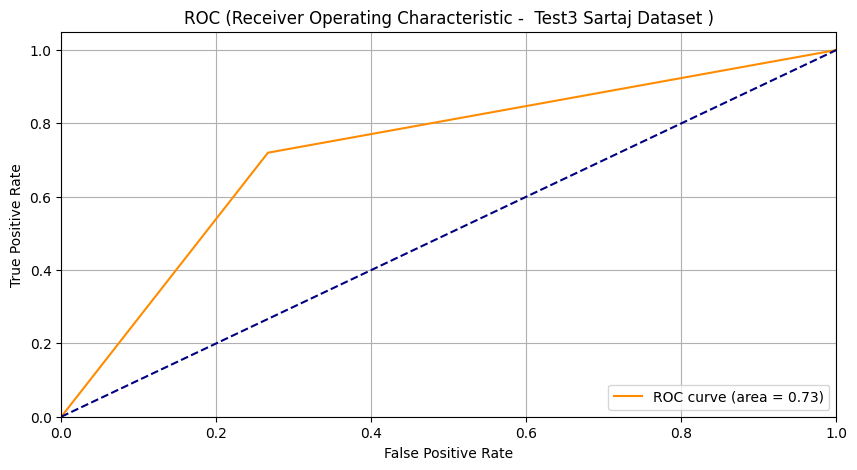

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic -  Test3 Sartaj Dataset )')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Predictions